<h1 style="text-align: center;">Partial Fraction Expansion</h1>
<p style="text-align: center;">Lab 6</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Use **scipy.signal.residue()** to perform partial fraction expansion. 

### 2. Deliverables Overview 
##### Part 1  
[ ] Plot for the step response from the prelab for **Task 1**.  
[ ] Plot for the step response using **scipy.signal.step()** for **Task 2**.  
[ ] Printed output for the partial fraction expansion for **Task 3**
  
##### Part 2
[ ] Printed output for the partial fraction expansion for **Task 1**
[ ] Plot for the response using the **Cosine Method** for **Task 2**.  
[ ] Plot the response using **scipy.signal.step() for **Task 3**  

### 3. Part 1
##### 3.1 Purpose
To plot the step response of your prelab results and then use the **scipy.signal.residue()** function to perform partial fraction expansion on the S-domain system found in the prelab.  
##### 3.2 Tasks   
1. Plot the step response $y(t)$ that you found by hand in the prelab assignment from $0 \le t \le 2$ s.

In [6]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

steps = 1e-2
t = np.arange(0, 2 + steps, steps)

In [7]:
def step(t):
    y = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] < 0:
            y[i] = 0
        else:
            y[i] = 1
    return y

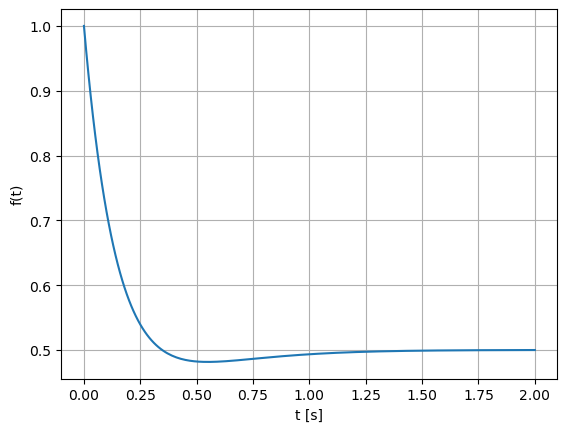

In [8]:
y = (0.5-0.5*np.exp(-4*t)+np.exp(-6*t))*step(t)

plt.figure()
plt.plot(t, y)
plt.grid()
plt.ylabel("f(t)")
plt.xlabel("t [s]")
plt.show()

2. Using the $H(s)$ that you found in the prelab, plot the step response using the **scipy.signal.step()** command. *Note: The plots from Tasks 1 and 2 should be identical.* 

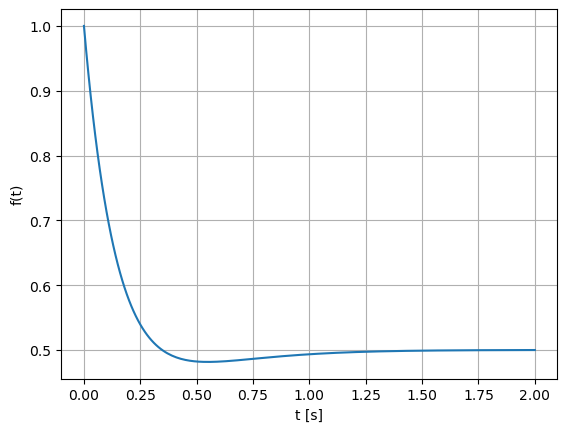

In [10]:
num = [1, 6, 12]
den = [1, 10, 24]
tout, yout = sig.step((num, den), T=t)

plt.figure()
plt.plot(tout, yout)
plt.grid()
plt.ylabel("f(t)")
plt.xlabel("t [s]")
plt.show()

3. Entering $Y(s)$ (i.e. $Y(s) = H(s)X(s)$) from the prelab into **scipy.signal.residue()**, print the partial fraction expansion results R, P, and K. Compare this expression with the partial fraction expansion results derived by hand in the prelab and check that they agree. *Note: You can look up how to use the **scipy.signal.residue()** function in the scipy.signal documentation. The den array used in the **scipy.signal.residue()** function will **not** be the same as the one used in the **scipy.signal.step()** function in Task 2.*

In [12]:
num = [1, 6, 12]
den = [1, 10, 24, 0]
[R, P, K] = sig.residue(num, den)

print("R = ", R)
print("P = ", P)
print("K = ", K)

R =  [ 0.5 -0.5  1. ]
P =  [ 0. -4. -6.]
K =  []


### 4. Part 2
##### 4.1 Purpose
Use **scipy.signal.residue()** to perform partial fraction expansion on a function that would be difficult to analyze by hand.
##### 4.2 Tasks   
A system is described by: $$y^{(5)}(t) + 18y^{(4)}(t) + 218y^{(3)}(t) + 2036y^{(2)}(t) + 9085y^{(1)}(t) + 25250y(t) = 25250x(t)$$  
1. For the system described above, use **scipy.signal.residue()** to find the partial fraction expansion of the step response and print the results R, P, and K.

In [40]:
num = [25250]
den = [1, 18, 218, 2036, 9085, 25250]
[R, P, K] = sig.residue(num, den)

print("R = ", R)
print("P = ", P)
print("K = ", K)

R =  [-1.45673077-4.12740385j -1.45673077+4.12740385j  2.14619635+0.j
  0.3836326 +0.97651934j  0.3836326 -0.97651934j]
P =  [ -3. +4.j  -3. -4.j -10. +0.j  -1.+10.j  -1.-10.j]
K =  []


2. Using the results from **Part 2, Task 1**, plot the time-domain response from $0 \le t \le 4.5$s using the cosine method. *Note: in Dr. Sullivan's notes, k is the residue of a given term. Also, the factor of 2 accounts for both terms in a complex conjugate pair.*

In [43]:
def cos_method(R, P, t):
    y = 0
    for i in range(len(R)):
        K_mag = np.abs(R[i])
        K_angle = np.angle(R[i])
        alpha = np.real(P[i])
        omega = np.imag(P[i])
        y = 2*K_mag*np.exp(alpha*t)*np.cos(omega*t+K_angle)*step(t)
    return y

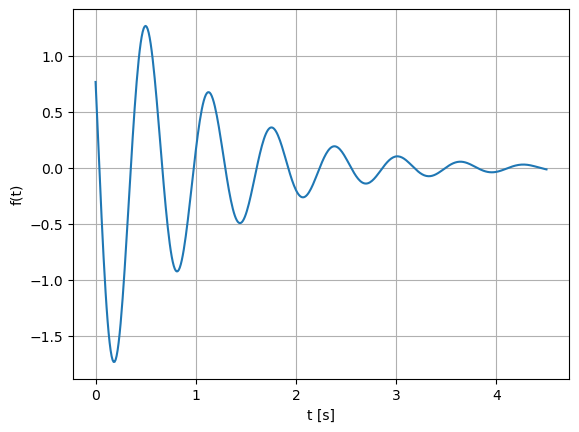

In [45]:
steps = 1e-2
t = np.arange(0, 4.5 + steps, steps)
y = cos_method(R, P, t)

plt.figure()
plt.plot(t, y)
plt.grid()
plt.ylabel("f(t)")
plt.xlabel("t [s]")
plt.show()

3. Using $H(s)$ from **Part 2, Task 1**, check your response from **Part 2, Task 2** using **scipy.signal.step()** and plot the results. *Note: Again, the den array used in **scipy.signal.step()** will **not** be the same as the one used in **scipy.signal.residue()** in **Part 2, Task 1**.*

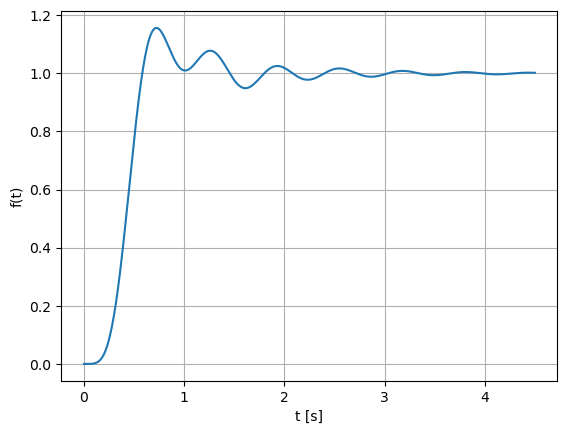

In [48]:
num = [25250]
den = [1, 18, 218, 2036, 9085, 25250]
tout, yout = sig.step((num, den), T=t)

plt.figure()
plt.plot(tout, yout)
plt.grid()
plt.ylabel("f(t)")
plt.xlabel("t [s]")
plt.show()

### 5. Questions
1. For a non-complex pole-residue term, you can still use the cosine method, explain why this works.  
>The cosine method works for non-complex poles because it enables the transformation of the system into sinusoidal terms, which are real-valued and perfectly represent real pole contributions in the Laplace domain, even when the poles are simple real numbers. 
2. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>Lab was perfectly clear.